# Regrid testing

Testing and evaluating the efficacy of the regrid process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.constants as c
import os

In [2]:
osm_dir = "yuxiang1_osm"

fits_files = np.array(os.listdir(osm_dir))
sort_type = [('file', 'O'), ('num', int)]
sort_prep = lambda x: (x, int(x.split('.')[1].split("_")[0]))
fits_files, _ = zip(*np.sort(np.array(list(map(sort_prep, fits_files)), dtype=sort_type), order="num"))

dfs = []

for file in fits_files:
    dfs.append(pd.read_csv(osm_dir+"/"+file, delimiter=" ", skiprows=3, index_col=False, names=["RA", "Dec", "Stokes I", "Q", "U", "V", "Freq0"]))

In [3]:
print(dfs[0])
print(dfs[1])
print(dfs[399])

                RA       Dec  Stokes I    Q    U    V        Freq0
0       359.680569 -0.319431  0.000420  0.0  0.0  0.0  198783000.0
1       359.680569 -0.317822  0.000000  0.0  0.0  0.0  198783000.0
2       359.680569 -0.316213  0.000387  0.0  0.0  0.0  198783000.0
3       359.680569 -0.314603  0.000000  0.0  0.0  0.0  198783000.0
4       359.680569 -0.312994  0.000000  0.0  0.0  0.0  198783000.0
...            ...       ...       ...  ...  ...  ...          ...
159995    0.322649  0.316213  0.000000  0.0  0.0  0.0  198783000.0
159996    0.322649  0.317822  0.000269  0.0  0.0  0.0  198783000.0
159997    0.322649  0.319431  0.000000  0.0  0.0  0.0  198783000.0
159998    0.322649  0.321040  0.003230  0.0  0.0  0.0  198783000.0
159999    0.322649  0.322649  0.000000  0.0  0.0  0.0  198783000.0

[160000 rows x 7 columns]
                RA       Dec      Stokes I    Q    U    V        Freq0
0       359.680569 -0.319431  6.751600e-04  0.0  0.0  0.0  198683000.0
1       359.680569 -0.31782

In [4]:
out_means = []
out_medians = []
out_maxes = []

for df in dfs:
    out_means.append(np.mean(df['Stokes I']))
    out_medians.append(np.median(df['Stokes I']))
    out_maxes.append(np.max(df['Stokes I']))

out_means = np.array(out_means[1:])
out_medians = np.array(out_medians[1:])
out_maxes = np.array(out_maxes[1:])

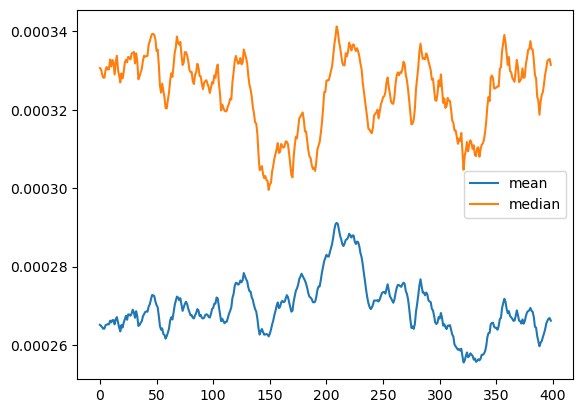

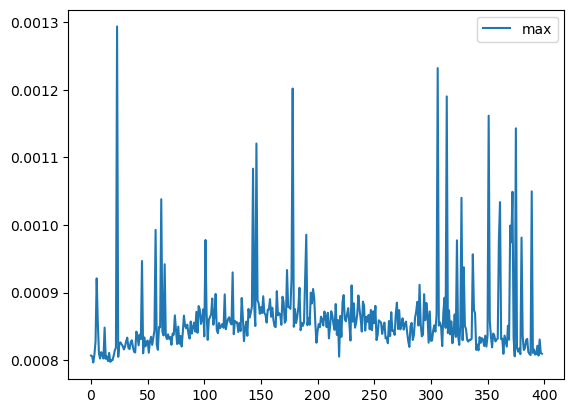

In [5]:
plt.plot(out_means, label="mean")
plt.plot(out_medians, label="median")
plt.legend()
plt.show()

plt.plot(out_maxes, label="max")
plt.legend()
plt.show()

## Testing Yuxiang's box

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

f1 = h5py.File('yuxiang_bts/yuxiang1.h5', 'r')
data1 = np.array(f1.get('BrightnessTemp')['brightness_temp'])

In [8]:
data1.shape

(400, 400, 400)

In [2]:
T_max = np.max(data1)
print(T_max)

37.33767


In [3]:
#rint(dfs[0]['Freq0'][0])

RAs = np.array(dfs[0]['RA'])
print(RAs < 180)

max_RA = np.max(RAs, where=(RAs < 180), initial=0)
min_RA = np.min(RAs, where=(RAs > 180), initial=360) - 360

print(max_RA, min_RA)

square_size = (np.pi/180) * (max_RA - min_RA) / 400

print(square_size)

L_max = 2e26 * c.k_B.value * (dfs[0]['Freq0'][0] ** 2) * T_max * (square_size ** 2) / (c.c.value ** 2)
print(L_max * 1e5)

NameError: name 'dfs' is not defined

In [4]:
median_arr = []
mean_arr = []
max_arr = []
centre_arr = []

x_mid = int(data1.shape[0]/2)
y_mid = int(data1.shape[1]/2)

for t in range(data1.shape[2]):
    channel = data1[:, :, t]
    median_arr.append(np.median(channel))
    mean_arr.append(np.mean(channel))
    max_arr.append(np.max(channel))
    centre_arr.append(channel[x_mid, y_mid])

median_arr = np.array(median_arr)
mean_arr = np.array(mean_arr)
max_arr = np.array(max_arr)
centre_arr = np.array(centre_arr)

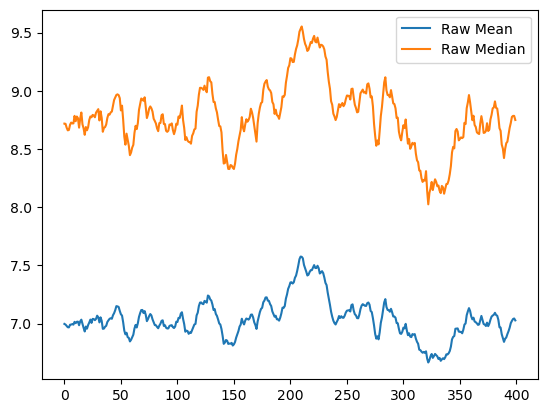

In [5]:
plt.plot(mean_arr, label="Raw Mean")
plt.plot(median_arr, label="Raw Median")
plt.legend()
plt.show()

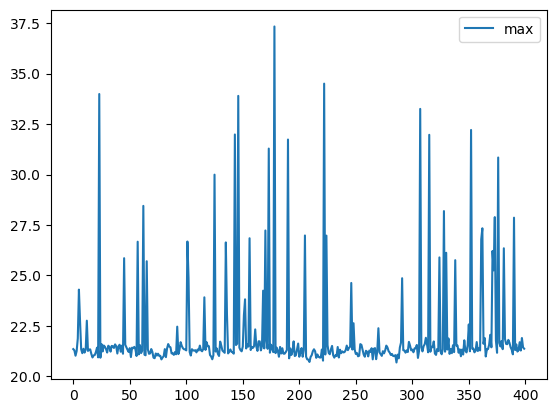

In [6]:
plt.plot(max_arr, label="max")
plt.legend()
plt.show()

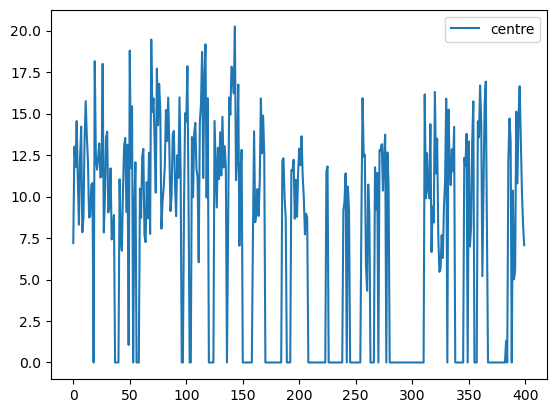

In [7]:
plt.plot(centre_arr, label="centre")
plt.legend()
plt.show()

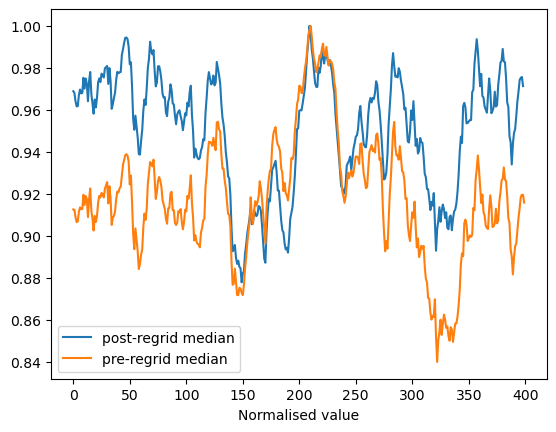

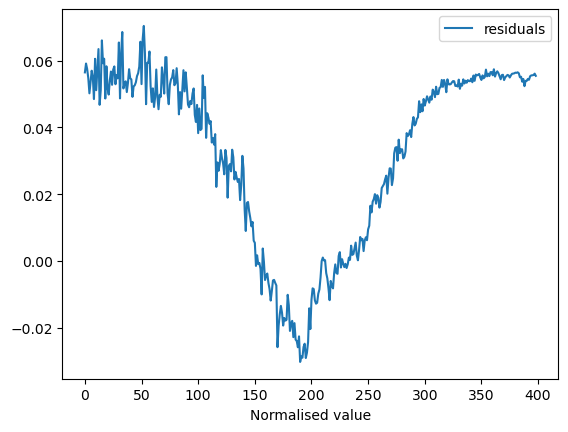

In [13]:
plt.plot(out_medians/np.max(out_medians), label="post-regrid median")
plt.plot(median_arr/np.max(median_arr), label="pre-regrid median")
plt.xlabel("Normalised value")
plt.legend()
plt.show()

plt.plot(out_medians/np.max(out_medians) - (median_arr/np.max(median_arr))[1:], label="residuals")
plt.xlabel("Normalised value")
plt.legend()
plt.show()

In [4]:
from astropy.coordinates import SkyCoord
import astropy.units as u

phase_ref_point = SkyCoord(ra=0*u.rad, dec=0*u.rad, frame='icrs')

phase_ref_point.dec.value

0.0

# Three-Way Testing

In [1]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.constants as c
import os
import h5py
from astropy.io import fits

In [2]:
# Retreive Yuxiang testing data, Normalise

f1 = h5py.File('yuxiang_bts/yuxiang1.h5', 'r')
data1 = np.array(f1.get('BrightnessTemp')['brightness_temp'])
#data1 = data1/np.max(data1)

median_arr = []
mean_arr = []
max_arr = []

for t in range(data1.shape[2]):
    channel = data1[:, :, t]
    median_arr.append(np.median(channel))
    mean_arr.append(np.mean(channel))
    max_arr.append(np.max(channel))

median_arr = np.array(median_arr)
mean_arr = np.array(mean_arr)
max_arr = np.array(max_arr)

In [3]:
# Retreive OSM data, Normalise

osm_dir = "yuxiang1_osm"

fits_files = np.array(os.listdir(osm_dir))
sort_type = [('file', 'O'), ('num', int)]
sort_prep = lambda x: (x, int(x.split('.')[1].split("_")[0]))
fits_files, _ = zip(*np.sort(np.array(list(map(sort_prep, fits_files)), dtype=sort_type), order="num"))

dfs = []

for file in fits_files:
    dfs.append(pd.read_csv(osm_dir+"/"+file, delimiter=" ", skiprows=3, index_col=False, names=["RA", "Dec", "Stokes I", "Q", "U", "V", "Freq0"]))

#print(dfs[0])

#master_max = - np.inf
#for df in dfs:
#    slice_max = np.max(df['Stokes I'])
    
#    if slice_max > master_max:
#        master_max = slice_max

#index_max = 0

#for df in dfs:
#    slice_I = np.array(df['Stokes I']) / master_max
#    df['Norm I'] = slice_I
#    if np.max(slice_I) >= 0.9:
#        print("Gotcha")
#        index_max = df

out_means = []
out_medians = []
out_maxes = []

for df in dfs:
    out_means.append(np.mean(df['Stokes I']))
    out_medians.append(np.median(df['Stokes I']))
    out_maxes.append(np.max(df['Stokes I']))

out_means = np.array(out_means[1:])
out_medians = np.array(out_medians[1:])
out_maxes = np.array(out_maxes[1:])

In [4]:
# Retreive finalised data, Normalised

cube = fits.open("./test_output/yuxiang1_fits_cube.fits")
cube = cube[0].data[:, 0, :, :]
#cube = cube / np.max(cube)

median_arr_cube = []
mean_arr_cube = []
max_arr_cube = []

for t in range(cube.shape[0]):
    channel = cube[t, :, :]
    median_arr_cube.append(np.median(channel))
    mean_arr_cube.append(np.mean(channel))
    max_arr_cube.append(np.max(channel))

median_arr_cube = np.array(median_arr_cube)
mean_arr_cube = np.array(mean_arr_cube)
max_arr_cube = np.array(max_arr_cube)

In [5]:
# Define normalisation function|

def normalise(x): return x[0:] / np.max(x[0:])

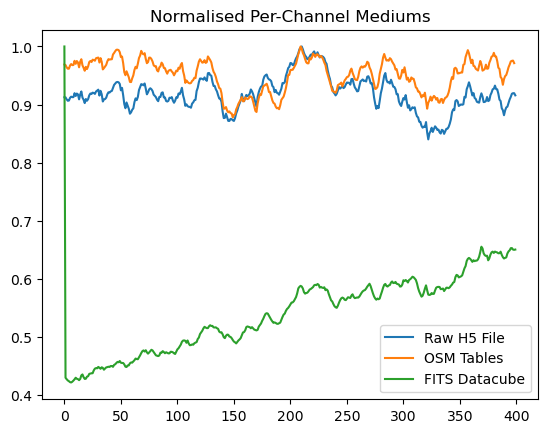

In [6]:
plt.plot(normalise(median_arr), label="Raw H5 File")
plt.plot(normalise(out_medians), label="OSM Tables")
plt.plot(normalise(median_arr_cube), label="FITS Datacube")
plt.title("Normalised Per-Channel Mediums")
plt.legend()
plt.show()

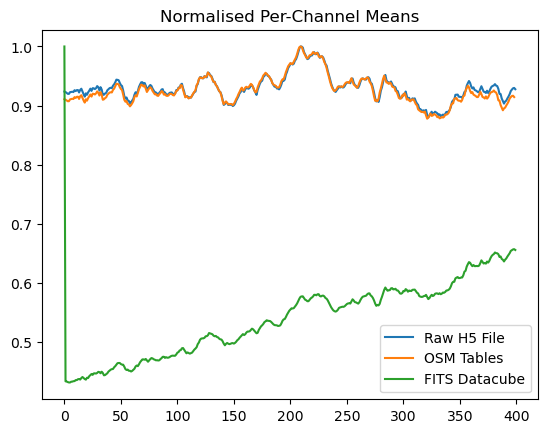

In [7]:
plt.plot(normalise(mean_arr), label="Raw H5 File")
plt.plot(normalise(out_means), label="OSM Tables")
plt.plot(normalise(mean_arr_cube), label="FITS Datacube")
plt.title("Normalised Per-Channel Means")
plt.legend()
plt.show()

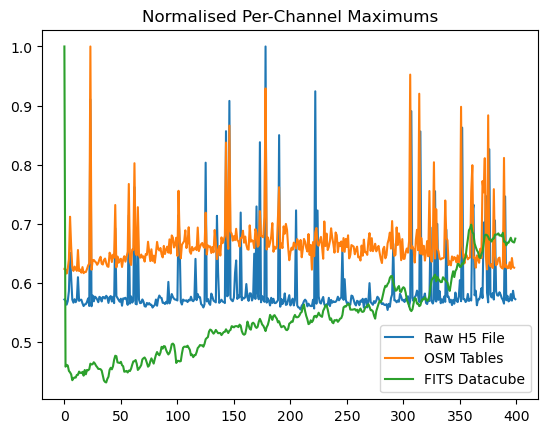

In [8]:
plt.plot(normalise(max_arr), label="Raw H5 File")
plt.plot(normalise(out_maxes), label="OSM Tables")
plt.plot(normalise(max_arr_cube), label="FITS Datacube")
plt.title("Normalised Per-Channel Maximums")
plt.legend()
plt.show()